In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone

# Read data

In [108]:
df_train =  pd.read_csv('train_preprocessed_v2.csv')
df_test = pd.read_csv('test_preprocessed_v2.csv')

In [109]:
df_train.sample(5)

,label,processed
5828,__label__1.0,máyảnh fuji instax
171,__label__1.0,chuột quang không dây genius
12613,__label__16.0,sáp bóng sơn liqui moly
37099,__label__14.0,chuông halli
60898,__label__11.0,kem gold


In [110]:
df_test.sample(5)

,label,processed
11227,__label__14.0,portable picnic food compartment
14174,__label__24.0,áokhoác creeper minecraft
17840,__label__12.0,giàytây tamanh
3605,__label__16.0,xeđạp thành
8231,__label__14.0,tranh canvas the girl


# Vectorize with tfidf

In [111]:
tfv = TfidfVectorizer(
    max_df=0.9,
                     min_df=3,
                     ngram_range=(1, 3),
#                      max_features=5000
                    )
lbencoder = LabelEncoder()

In [ ]:
X_train = tfv.fit_transform(df_train.processed)
y_train = lbencoder.fit_transform(df_train.label)
X_test = tfv.transform(df_test['processed'])
y_test = lbencoder.transform(df_test['label'])

In [113]:
X_train.shape

(84847, 21683)

In [ ]:
kfold = StratifiedKFold(n_splits=5, random_state=2)

# Find model

## Random forest

In [114]:
# param_grid = [
# {'n_estimators': [10, 30], 'max_features': [.5, .7, .9], 'class_weight':['balanced']}, 
# # {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'class_weight':['balanced']},
# ]
# RF = RandomForestClassifier()

In [115]:
# %%time
# gsCV = GridSearchCV(RF, param_grid=param_grid, cv=5, scoring='f1_macro', return_train_score=True, verbose=3, n_jobs=-1)
# gsCV.fit(X_train, y_train)

In [116]:
# gsCV.best_estimator_

In [117]:
# gsCV.best_score_

In [120]:
# %%time
# for train_index, test_index in kfold.split(X_train, y_train):
#     clone_clf = clone(RF)
#     X_train_folds = X_train[train_index]
#     y_train_folds = (y_train[train_index])
#     X_test_fold = X_train[test_index]
#     y_test_fold = (y_train[test_index])
#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     print(f1_score(y_test_fold, y_pred, average='macro')) 

In [121]:
# gsCV.cv_results_

In [122]:
%%time
RF = RandomForestClassifier(class_weight='balanced')
RF.fit(X_train, y_train)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 21 s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

**************************************************************
*****************          test set          *****************
**************************************************************

               precision    recall  f1-score   support

 __label__1.0       0.88      0.89      0.88      4874
__label__11.0       0.62      0.87      0.73      1709
__label__12.0       0.87      0.83      0.85      6010
__label__14.0       0.79      0.78      0.79      3929
__label__16.0       0.67      0.76      0.71       309
__label__24.0       0.73      0.46      0.57      1195
 __label__9.0       0.67      0.74      0.70       485

     accuracy                           0.81     18511
    macro avg       0.75      0.76      0.75     18511
 weighted avg       0.82      0.81      0.81     18511



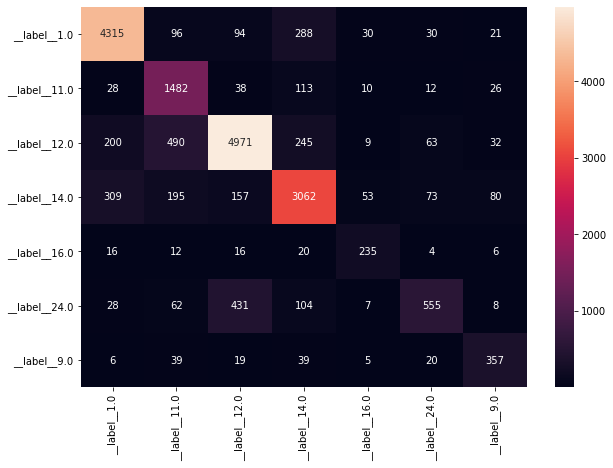

**************************************************************
*****************         train set          *****************
**************************************************************

               precision    recall  f1-score   support

 __label__1.0       0.99      0.98      0.98     16798
__label__11.0       0.98      0.99      0.98     13617
__label__12.0       0.98      0.99      0.99     20261
__label__14.0       0.99      0.97      0.98     21814
__label__16.0       0.89      0.97      0.93      1515
__label__24.0       0.97      0.94      0.95      5900
 __label__9.0       0.97      0.97      0.97      4942

     accuracy                           0.98     84847
    macro avg       0.96      0.97      0.97     84847
 weighted avg       0.98      0.98      0.98     84847



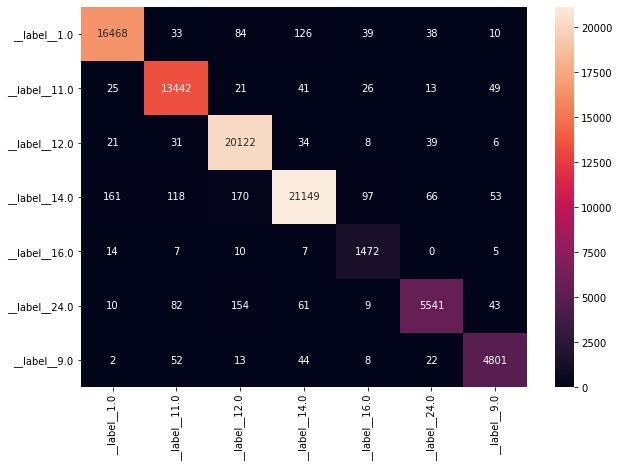

In [123]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)
print('\033[5;33;40m'+'*'*62+f"\n{'*'*17:20} \033[0;0m{'test set':^20}\033[5;33;40m {'*'*17:>20}\n{'*'*62}\n\033[5;33;47m")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = lbencoder.classes_,
                  columns = lbencoder.classes_)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
print(classification_report(y_test,  y_test_pred,  target_names=lbencoder.inverse_transform(range(7))))

plt.show()
print('\033[5;37;40m'+'*'*62+f"\n{'*'*17:20} {'train set':^20} {'*'*17:>20}\n{'*'*62}\n")
print(classification_report(y_train,  y_train_pred,  target_names=lbencoder.inverse_transform(range(7))))
df_cm = pd.DataFrame(confusion_matrix(y_train, y_train_pred), index = lbencoder.classes_,
                  columns = lbencoder.classes_)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.show()



## Naive bayes 

### Tuning alpha in naive bayes

In [124]:
%%time
for alpha in [0.001, 0.01, 0.1, 1, 10]:
    print('\033[1;33malpha='+str(alpha)+'\033[0;35m')
    f1_test, f1_train=[], []
    lgt = MultinomialNB(alpha=alpha)
    for train_index, test_index in kfold.split(X_train, y_train):
        clone_clf = clone(lgt)
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        f1_test.append(f1_score(y_test_fold, y_pred, average='macro'))
        f1_train.append(f1_score(y_train_folds, clone_clf.predict(X_train_folds), average='macro'))
    for pair in zip(f1_test, f1_train):
        print(pair)
    print('-'*30)
    print(np.mean(f1_test), np.mean(f1_train))
    print('\n')

alpha=0.001
(0.8528656980944344, 0.9189574428713343)
(0.825165139267895, 0.9254581692028468)
(0.7681971049890508, 0.9275627453469591)
(0.7872980279107198, 0.9303458197363697)
(0.7823852800837864, 0.9307425425012986)
------------------------------
0.8031822500691772 0.9266133439317616


alpha=0.01
(0.8567358293473004, 0.9172892349391532)
(0.8302070869726442, 0.923859039924114)
(0.7719279812022508, 0.925200934441971)
(0.7919533604066027, 0.9287663123369335)
(0.7872291810631535, 0.9292574049401198)
------------------------------
0.8076106877983904 0.9248745853164584


alpha=0.1
(0.8700510597630176, 0.9069180741813297)
(0.8408636831482715, 0.9168217247146692)
(0.7861165615993426, 0.9168576950727637)
(0.8067520026062468, 0.9205172786985145)
(0.7973024856979094, 0.9216022090167109)
------------------------------
0.8202171585629575 0.9165433963367976


alpha=1
(0.7996460987901213, 0.8377339611449314)
(0.7646798087212721, 0.8467323332341475)
(0.7330514910773009, 0.8430017436389674)
(0.74285433

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.5249025695506799, 0.547882165188503)
(0.5258293391883476, 0.5525647950850525)
(0.5011856218543261, 0.5535502071653479)
(0.5083029431632987, 0.5609948231248777)
(0.5098936011406535, 0.5592661005220494)
------------------------------
0.5140228149794612 0.5548516182171661


Wall time: 1.99 s


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive bayes gives best result with alpha=0.1

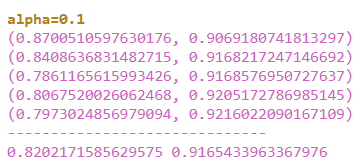

In [125]:
nvbs = MultinomialNB(alpha=0.1)

In [126]:
%%time
nvbs.fit(X_train, y_train)

Wall time: 40.9 ms


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

**************************************************************
*****************          test set          *****************
**************************************************************

               precision    recall  f1-score   support

 __label__1.0       0.90      0.90      0.90      4874
__label__11.0       0.88      0.86      0.87      1709
__label__12.0       0.87      0.93      0.90      6010
__label__14.0       0.80      0.83      0.81      3929
__label__16.0       0.92      0.75      0.83       309
__label__24.0       0.78      0.51      0.62      1195
 __label__9.0       0.80      0.70      0.75       485

     accuracy                           0.86     18511
    macro avg       0.85      0.78      0.81     18511
 weighted avg       0.86      0.86      0.86     18511



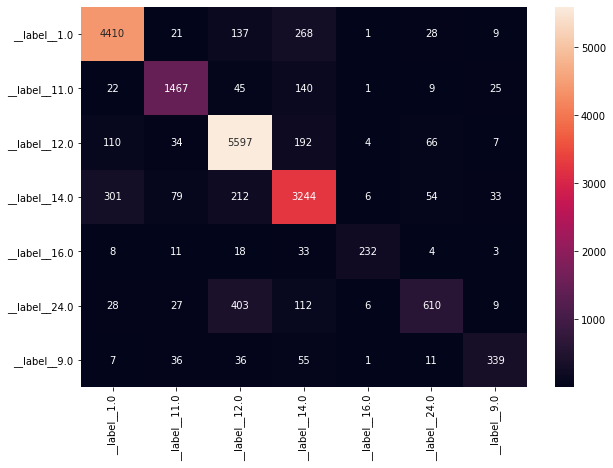

**************************************************************
*****************         train set          *****************
**************************************************************

               precision    recall  f1-score   support

 __label__1.0       0.94      0.94      0.94     16798
__label__11.0       0.94      0.94      0.94     13617
__label__12.0       0.93      0.98      0.95     20261
__label__14.0       0.91      0.93      0.92     21814
__label__16.0       0.96      0.79      0.87      1515
__label__24.0       0.93      0.80      0.86      5900
 __label__9.0       0.93      0.88      0.90      4942

     accuracy                           0.93     84847
    macro avg       0.94      0.89      0.91     84847
 weighted avg       0.93      0.93      0.93     84847



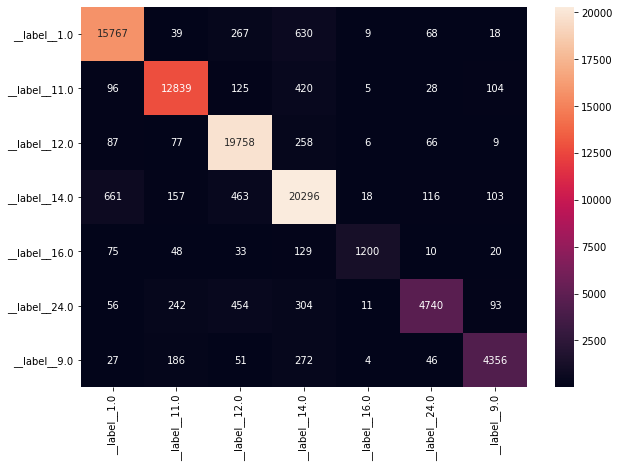

In [127]:
y_test_pred = nvbs.predict(X_test)
y_train_pred = nvbs.predict(X_train)

print('\033[5;33;40m'+'*'*62+f"\n{'*'*17:20} {'test set':^20} {'*'*17:>20}\n{'*'*62}\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = lbencoder.classes_,
                  columns = lbencoder.classes_)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
print(classification_report(y_test,  y_test_pred,  target_names=lbencoder.inverse_transform(range(7))))

plt.show()

print('\033[5;33;40m'+'*'*62+f"\n{'*'*17:20} {'train set':^20} {'*'*17:>20}\n{'*'*62}\n")
print(classification_report(y_train,  y_train_pred,  target_names=lbencoder.inverse_transform(range(7))))
df_cm = pd.DataFrame(confusion_matrix(y_train, y_train_pred), index = lbencoder.classes_,
                  columns = lbencoder.classes_)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.show()



## Logistic regression

### solver='lbfgs', penalty='l2', tuning C

In [137]:
%%time
print('\033[4msolver lbfgs, l2-regularization\033[0;0m')
for C in [0.1, 1, 10]:
    print('\033[1;33mC='+str(C)+'\033[0;35m')
    f1_test, f1_train=[], []
    lgt = LogisticRegression(solver='lbfgs', penalty='l2', C=C, multi_class='auto', max_iter=10000, class_weight='balanced')

    for train_index, test_index in kfold.split(X_train, y_train):
        clone_clf = clone(lgt)
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        f1_test.append(f1_score(y_test_fold, y_pred, average='macro'))
        f1_train.append(f1_score(y_train_folds, clone_clf.predict(X_train_folds), average='macro'))
    for pair in zip(f1_test, f1_train):
        print(pair)
    print('-'*30)
    print(np.mean(f1_test), np.mean(f1_train))
    print('\n')

solver lbfgs, l2-regularization
C=0.1
(0.7900813657868291, 0.8172982042642596)
(0.7840803578930393, 0.8323033270064581)
(0.7862480666022141, 0.831052872649754)
(0.7330429333681117, 0.8354924266995537)
(0.7329270879055609, 0.834474481881229)
------------------------------
0.765275962311151 0.8301242625002508


C=1
(0.8547267840679902, 0.9004518678143503)
(0.8298478435653573, 0.909189733162658)
(0.8198083919597303, 0.9101916145911909)
(0.7837818312278672, 0.9136053118971902)
(0.7901214580916516, 0.9145568681050636)
------------------------------
0.8156572617825194 0.9095990791140907


C=10
(0.8600737662439265, 0.9380563388514709)
(0.8325213181638967, 0.9448177464961621)
(0.8184820502596563, 0.9482306534250506)
(0.7870273646251332, 0.9494391891194853)
(0.7877664792241512, 0.9510062897075569)
------------------------------
0.8171741957033529 0.9463100435199452


Wall time: 5min 27s


### solver='newton-cg', penalty='l2',tuning C

In [138]:
%%time
print('\033[4msolver newton-cg, l2-regularization\033[0;0m')
for C in [0.1, 1, 10]:
    print('\033[1;33mC='+str(C)+'\033[0;35m')
    f1_test, f1_train=[], []
    lgt = LogisticRegression(solver='newton-cg', penalty='l2', C=C, multi_class='auto', max_iter=10000, class_weight='balanced')

    for train_index, test_index in kfold.split(X_train, y_train):
        clone_clf = clone(lgt)
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        f1_test.append(f1_score(y_test_fold, y_pred, average='macro'))
        f1_train.append(f1_score(y_train_folds, clone_clf.predict(X_train_folds), average='macro'))
    for pair in zip(f1_test, f1_train):
        print(pair)
    print('-'*30)
    print(np.mean(f1_test), np.mean(f1_train))
    print('\n')

solver newton-cg, l2-regularization
C=0.1
(0.7898154806718113, 0.8174193553528328)
(0.7841464303889264, 0.8324144595686394)
(0.7862480666022141, 0.8310461181265476)
(0.7330429333681117, 0.8353939882662934)
(0.7329749314460303, 0.8344616367080616)
------------------------------
0.7652455684954187 0.830147111604475


C=1
(0.8547267840679902, 0.900487226578811)
(0.8298478435653573, 0.9091580104232309)
(0.8198337722478674, 0.9101916145911909)
(0.7837818312278672, 0.9136229157777593)
(0.7901214580916516, 0.9145932147677367)
------------------------------
0.8156623378401469 0.9096105964277458


C=10
(0.8600391424777493, 0.9380563388514709)
(0.8324210495921599, 0.9448923321707604)
(0.8183685742536989, 0.9482488214782681)
(0.7869539630488258, 0.9494625133153581)
(0.7878029006430667, 0.9510613777071308)
------------------------------
0.8171171260031003 0.9463442767045978


Wall time: 2min 35s


## no penalty

In [130]:
%%time
for solver in ['lbfgs', 'newton-cg']:
    print('\033[4m'+str(solver)+' no penalty\033[0;0m\n')
    f1_test, f1_train=[], []
    for train_index, test_index in kfold.split(X_train, y_train):        
        clone_clf = clone(LogisticRegression(solver=solver, multi_class='auto', max_iter=10000, class_weight='balanced'))
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        f1_test.append(f1_score(y_test_fold, y_pred, average='macro'))
        f1_train.append(f1_score(y_train_folds, clone_clf.predict(X_train_folds), average='macro'))
    for pair in zip(f1_test, f1_train):
        print(pair)
    print('-'*30)
    print(np.mean(f1_test), np.mean(f1_train))
    print('\n')

lbfgs no penalty

(0.8547267840679902, 0.9004518678143503)
(0.8298478435653573, 0.909189733162658)
(0.8198083919597303, 0.9101916145911909)
(0.7837818312278672, 0.9136053118971902)
(0.7901214580916516, 0.9145568681050636)
------------------------------
0.8156572617825194 0.9095990791140907


newton-cg no penalty

(0.8547267840679902, 0.900487226578811)
(0.8298478435653573, 0.9091580104232309)
(0.8198337722478674, 0.9101916145911909)
(0.7837818312278672, 0.9136229157777593)
(0.7901214580916516, 0.9145932147677367)
------------------------------
0.8156623378401469 0.9096105964277458


Wall time: 2min 22s


### logistic regression gives best  result with solver='lbfgs', penalty='l2', C=10

In [131]:
lgt = LogisticRegression(solver='lbfgs', penalty='l2', C=10, multi_class='auto', max_iter=10000, class_weight='balanced')

In [132]:
%%time
lgt.fit(X_train, y_train)

Wall time: 54.4 s


LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

**************************************************************
*****************          test set          *****************
**************************************************************

               precision    recall  f1-score   support

 __label__1.0       0.91      0.90      0.91      4874
__label__11.0       0.85      0.87      0.86      1709
__label__12.0       0.90      0.91      0.90      6010
__label__14.0       0.83      0.79      0.81      3929
__label__16.0       0.60      0.87      0.71       309
__label__24.0       0.66      0.62      0.64      1195
 __label__9.0       0.65      0.81      0.72       485

     accuracy                           0.85     18511
    macro avg       0.77      0.82      0.79     18511
 weighted avg       0.86      0.85      0.85     18511



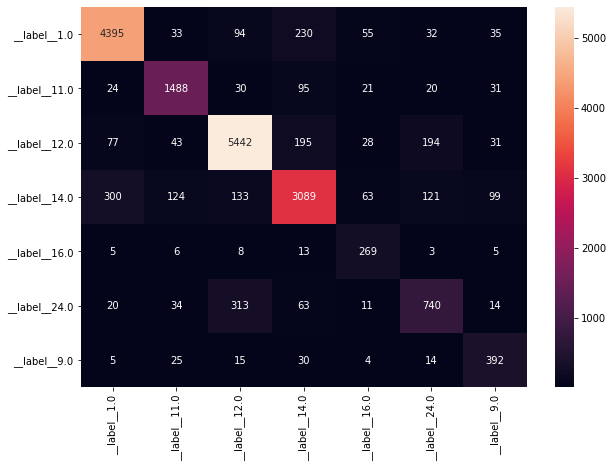

**************************************************************
*****************         train set          *****************
**************************************************************

               precision    recall  f1-score   support

 __label__1.0       0.96      0.95      0.96     16798
__label__11.0       0.97      0.96      0.97     13617
__label__12.0       0.97      0.97      0.97     20261
__label__14.0       0.96      0.93      0.95     21814
__label__16.0       0.81      0.99      0.89      1515
__label__24.0       0.88      0.94      0.91      5900
 __label__9.0       0.91      0.97      0.94      4942

     accuracy                           0.95     84847
    macro avg       0.92      0.96      0.94     84847
 weighted avg       0.96      0.95      0.95     84847



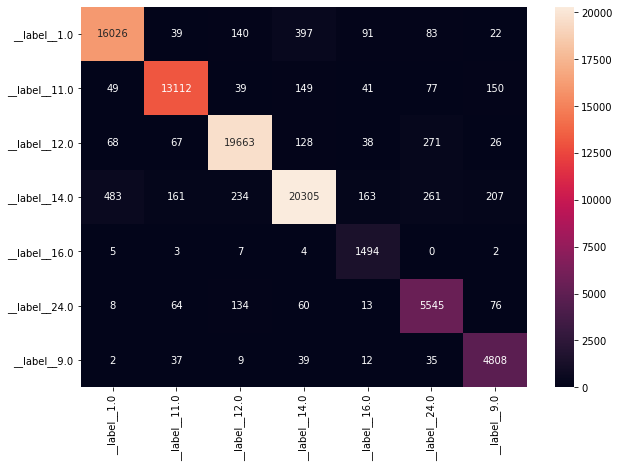

In [133]:
y_test_pred = lgt.predict(X_test)
y_train_pred = lgt.predict(X_train)

print('\033[5;33;40m'+'*'*62+f"\n{'*'*17:20} {'test set':^20} {'*'*17:>20}\n{'*'*62}\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = lbencoder.classes_,
                  columns = lbencoder.classes_)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
print(classification_report(y_test,  y_test_pred,  target_names=lbencoder.inverse_transform(range(7))))

plt.show()

print('\033[5;33;40m'+'*'*62+f"\n{'*'*17:20} {'train set':^20} {'*'*17:>20}\n{'*'*62}\n")
print(classification_report(y_train,  y_train_pred,  target_names=lbencoder.inverse_transform(range(7))))
df_cm = pd.DataFrame(confusion_matrix(y_train, y_train_pred), index = lbencoder.classes_,
                  columns = lbencoder.classes_)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.show()

